In [2]:
import monkdata as m
import dtree as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assignment 0:

**Each one of the datasets has properties which makes them hard to learn. Motivate which of the three problems is most difficult for a decision tree algorithm to learn.**


![title](img/attributes.png)

![title](img/table1.png)


Looking at Table 1 and considering the amount information given about the data set. 

Monk-3 is the easiest for a decision tree and Monk-1 is the hardest. 

I was thinking about the amount of information given in each of the logical statements. And in Monk-3 the information is very **explicit** in the values of the attributes (a5 = 1 and a4 =1... that is easy for the decision tree to read)... where as monk-1 could be tricky because if a1 = a2, there are three combinations of values for which that statement in true.

# Assignment 1: 

**The file dtree.py defines a function entropy which calculates the entropy of a dataset. Import this file along with the monks datasets and use it to calculate the entropy of the training datasets.**


In [3]:
# assign data of lists.  
data = {'Entropy': np.zeros(3)}  
  
# Create DataFrame  
df_A1 = pd.DataFrame(data, index = ['Monk1', 'Monk2', 'Monk3',])
df_A1.loc['Monk1'] = dt.entropy(m.monk1)
df_A1.loc['Monk2'] = dt.entropy(m.monk2)
df_A1.loc['Monk3'] = dt.entropy(m.monk3)
df_A1

,Entropy
Monk1,1.000000
Monk2,0.957117
Monk3,0.999806


# Assignment 2: 
**Explain entropy for a uniform distribution and a non-uniform distribution, present some example distributions with high and low entropy.**

Entropy is a measure of "uncertainty" or "unpredictability". 

The uniform distribution is the least informative distribution. It therefore has the highest entropy. 

When rolling a fair dice numbered from 1 to 6, each side has equal probability of facing up, and the probability of each number would be 1/6. This is an example of a **uniform distribution**; it is a model for no preference. On the other hand, rolling a biased dice is an example of a **non-uniform distribution**. The probability associated with getting certain outcome is higher than in the case of a fair dice.

**Examples:**
#### Dice Example 
- The entropy associated with rolling a fair dice is 2.58 (evaluated in last week's lecture).
- The entropy associated with rolling a fake dice (0.5 for side 6) is 2.16. Which is lower than the fair dice because it is more likely for the 6th side to present itself. 

#### Coin Example
- The entropy associated with tossing a fair coin is 1 (this is lower than 2.58 because the probability of getting head/ tail is 1/2 which is higher than 1/6 --> less uncertainty for the coin than for the dice).
- The entropy associated with tossing a biased coin would have an entropy that is lower than 1 since the head/ tail outcomes are more predictable than when the coin was fair.



![title](img/tossingcoin.png)

# Assignment 3:
**Use the function averageGain (defined in dtree.py) to calculate the expected information gain corresponding to each of the six attributes. Note that the attributes are represented as instances of the class Attribute (defined in monkdata.py) which you can access via m.attributes[0], ..., m.attributes[5]. Based on the results, which attribute should be used for splitting the examples at the root node?**

In [10]:
# Create a list containing the monk data
list_monk = [m.monk1, m.monk2, m.monk3]

# assign data of lists.  
data_A3 = {'a1':np.zeros(3), 'a2':np.zeros(3), 'a3':np.zeros(3), 'a4':np.zeros(3), 'a5':np.zeros(3), 'a6':np.zeros(3)}
  
# Create empty DataFrame with Monk-X Index
df_A3 = pd.DataFrame(data_A3, index = ['Monk1', 'Monk2', 'Monk3'])

# Use for loop to calculate and populate data frame with Average Gain for all three data sets and all six attributes
# Access the list of names in columns 'Monk1, Monk2, Monk3' --> df_A3.columns[i]
# Access the list of names in index 'a1, a3, a3, etc...' --> df_A3.index[j]
# Acess the datasets --> list_monk[i]
# Acess the attributres --> m.attributes[j] 

for i in range(3):
    for j in range(6):
        df_A3.loc[df_A3.index[i],df_A3.columns[j]] = dt.averageGain(list_monk[i],m.attributes[j])
df_A3

,a1,a2,a3,a4,a5,a6
Monk1,0.075273,0.005838,0.004708,0.026312,0.287031,0.000758
Monk2,0.003756,0.002458,0.001056,0.015664,0.017277,0.006248
Monk3,0.007121,0.293736,0.000831,0.002892,0.255912,0.007077


In [11]:
df_A3.max(axis=1)

Monk1    0.287031
Monk2    0.017277
Monk3    0.293736
dtype: float64

In [12]:
df_A3.idxmax(axis=1)

Monk1    a5
Monk2    a5
Monk3    a2
dtype: object

**Conclusion**:
Based on the results we decide that:
- Monk1 should be split on attribute 5.
- Monk2 should be split on attribute 5.
- Monk3 should be split on attribute 2.

# Assignment 4
**For splitting we choose the attribute that maximizes the information gain, Eq.3. Looking at Eq.3 how does the entropy of the subsets, Sk, look like when the information gain is maximized? How can we motivate using the information gain as a heuristic for picking an attribute for splitting? Think about reduction in entropy
after the split and what the entropy implies.**

![title](img/equation3lab1.png)

If we are trying to maximize the gain of Eq(3), then the second term of the equation should be minimized. Therefore, we are looking for an attribute which has quite low entropy, meaning that the attribute is **predictable** (we want to make a split on the attribute that gives us the MOST information on the response). 

**Maximizing information gain --> minimizing entropy --> minimizing uncertainty --> maximizing information needed to determine the outcome.**

# Building Monk1 decision tree (first two levels)

### Splitting at attribute 5 and creating four subsets (one subset per attribute)

![title](img/monk1tree.png)

In [13]:
# Monk1 Root Node = a5 
# Creating four subsets for monk1 
split1_1 = dt.select(m.monk1, m.attributes[4], 1) # attribute 1 
split1_2 = dt.select(m.monk1, m.attributes[4], 2) # attribute 2 
split1_3 = dt.select(m.monk1, m.attributes[4], 3) # attribute 3 
split1_4 = dt.select(m.monk1, m.attributes[4], 4) # attribute 4 

dict_m1a5 = {'split1_1' : split1_1, 'split1_2': split1_2, 'split1_3': split1_3, 'split1_4': split1_4}

### For each subset, compute information gain in order to know how each subset should be split

In [14]:
# Exclude attribute a5 (at index 4)
# Create a dictionary with keys = split1_x and values = list of attributes

new_dict = {}
for key, value in dict_m1a5.items():
    new_dict[key] = []
    for attribute in [m.attributes[0], m.attributes[1], m.attributes[2], m.attributes[3], m.attributes[5]]:
        new_dict[key].append(dt.averageGain(value,attribute))

split1_monk1 = pd.DataFrame.from_dict(new_dict)
split1_monk1.rename(index= {0:1, 1:2, 2:3, 3:4, 4:6})

,split1_1,split1_2,split1_3,split1_4
1,0.0,0.040217,0.033055,0.206291
2,0.0,0.015063,0.002197,0.033898
3,0.0,0.037273,0.017982,0.025906
4,0.0,0.048892,0.019123,0.075933
6,0.0,0.025807,0.045109,0.003324


### Maximization of information gain when splitting on attribute 5:

In [15]:
split1_monk1.max()

split1_1    0.000000
split1_2    0.048892
split1_3    0.045109
split1_4    0.206291
dtype: float64

- Subset 1 --> All values equal zero for IG because when a5 = 1, the classification is True. No more splitting is needed (Leaf node).

- Subset 2 --> We should split on a4, because IG is max

- Subset 3 --> We should split on a6, because IG is max

- Subset 4 --> We should split on a1, because IG is max

### Subset 1 : no split needed

### Subset 2 : split at attribute 4

In [16]:
# creating subsets for split on subset 2 attribute 4

split2_subset2_1 = dt.select(split1_2, m.attributes[3], 1)
split2_subset2_2 = dt.select(split1_2, m.attributes[3], 2)
split2_subset2_3 = dt.select(split1_2, m.attributes[3], 3)

dict_split2_subset2 = {'split2_subset2_1' : split2_subset2_1, 'split2_subset2_2': split2_subset2_2, 'split2_subset2_3': split2_subset2_3}

In [17]:
# For each subset compute information gains
# Exclude attribute a4 and a5 ... at index 3 and 4
# Create a dictionary with keys = split2_subset2_x and values = list of attributes

new_dict_split2sub2 = {}
for key, value in dict_split2_subset2.items():
    new_dict_split2sub2[key] = []
    for attribute in [m.attributes[0], m.attributes[1], m.attributes[2], m.attributes[5]]:
        new_dict_split2sub2[key].append(dt.averageGain(value,attribute))


split2_subset2 = pd.DataFrame.from_dict(new_dict_split2sub2)
split2_subset2.rename(index= {0:1, 1:2, 2:3, 3:6})


,split2_subset2_1,split2_subset2_2,split2_subset2_3
1,0.060879,0.198117,0.068187
2,0.016313,0.591673,0.088546
3,0.051800,0.128085,0.130719
6,0.051800,0.198117,0.000450


In [18]:
split2_subset2.max()

split2_subset2_1    0.060879
split2_subset2_2    0.591673
split2_subset2_3    0.130719
dtype: float64

**Split 2, subset 2**

- for subset 1 --> split at attribute a1
- for subset 2 --> split at attribute a2
- for subset 3 --> split at attribute a3


### Subset 3: split at attribute 6

In [19]:
# creating subsets for split on subset 3 attribute 6

split2_subset3_1 = dt.select(split1_3, m.attributes[5], 1)
split2_subset3_2 = dt.select(split1_3, m.attributes[5], 2)

dict_split2_subset3 = {'split2_subset3_1' : split2_subset3_1, 'split2_subset3_2': split2_subset3_2}

# For each subset compute information gains
# Exclude attribute a6 and a5 ... at index 5 and 4
# Create a dictionary with keys = split2_subset3_x and values = list of attributes

new_dict_split2sub3 = {}
for key, value in dict_split2_subset3.items():
    new_dict_split2sub3[key] = []
    for attribute in [m.attributes[0], m.attributes[1], m.attributes[2], m.attributes[3]]:
        new_dict_split2sub3[key].append(dt.averageGain(value,attribute))


split2_subset3 = pd.DataFrame.from_dict(new_dict_split2sub3)
split2_subset3.rename(index= {0:1, 1:2, 2:3, 3:4})

,split2_subset3_1,split2_subset3_2
1,0.036928,0.034883
2,0.105897,0.003585
3,0.000661,0.123694
4,0.128243,0.034883


In [20]:
split2_subset3.max()

split2_subset3_1    0.128243
split2_subset3_2    0.123694
dtype: float64

**Split 2, subset 3**

- for subset 1 --> split at attribute a4
- for subset 2 --> split at attribute a3

### Subset 4: split at attribute 1

In [21]:
# creating subsets for split on subset 4 attribute 1

split2_subset4_1 = dt.select(split1_4, m.attributes[0], 1)
split2_subset4_2 = dt.select(split1_4, m.attributes[0], 2)
split2_subset4_3 = dt.select(split1_4, m.attributes[0], 3)

dict_split2_subset4 = {'split2_subset4_1' : split2_subset4_1, 'split2_subset4_2': split2_subset4_2, 'split2_subset4_3' : split2_subset4_3}

# For each subset compute information gains
# Exclude attribute a1 and a5 ... at index 0 and 4
# Create a dictionary with keys = split2_subset4_x and values = list of attributes

new_dict_split2sub4 = {}
for key, value in dict_split2_subset4.items():
    new_dict_split2sub4[key] = []
    for attribute in [m.attributes[1], m.attributes[2], m.attributes[3], m.attributes[5]]:
        new_dict_split2sub4[key].append(dt.averageGain(value,attribute))


split2_subset4 = pd.DataFrame.from_dict(new_dict_split2sub4)
split2_subset4.rename(index= {0:2, 1:3, 2:4, 3:6})

,split2_subset4_1,split2_subset4_2,split2_subset4_3
2,0.371232,0.945660,0.918296
3,0.075396,0.072057,0.018311
4,0.075396,0.253875,0.029407
6,0.075396,0.003430,0.024758


In [22]:
split2_subset4.max()

split2_subset4_1    0.371232
split2_subset4_2    0.945660
split2_subset4_3    0.918296
dtype: float64

**Split 2, subset 4**

- for subset 1 --> split at attribute a2
- for subset 2 --> split at attribute a2
- for subset 2 --> split at attribute a2

### Using mostCommon function to obtain the majority class for each subset

In [23]:
subset_dict = {}

for subset in [dict_split2_subset2, dict_split2_subset3, dict_split2_subset4]:
    subset_dict.update(subset)

In [24]:
final_dict = {'True/False' : []}
index_list = []

for subset_name, subset in subset_dict.items():
    if dt.mostCommon(subset) == True:
        final_dict['True/False'].append(1)
    else:
        final_dict['True/False'].append(0)
    index_list.append(subset_name)

final_df = pd.DataFrame.from_dict(final_dict)
final_df['index'] = index_list
final_df.set_index('index')

,True/False
index,
split2_subset2_1,0
split2_subset2_2,0
split2_subset2_3,0
split2_subset3_1,0
split2_subset3_2,0
split2_subset4_1,0
split2_subset4_2,0
split2_subset4_3,1


# Assignment 5
**Build the full decision trees for all three Monk datasets using buildTree. Then, use the function check to measure the performance of the decision tree on both the training and test datasets.
For example to built a tree for monk1 and compute the performance on the test data you could use:**
- import monkdata as m
- import dtree as d
- t=d.buildTree(m.monk1, m.attributes);
- print(d.check(t, m.monk1test))


**Compute the train and test set errors for the three Monk datasets
for the full trees. Were your assumptions about the datasets correct?
Explain the results you get for the training and test datasets.**

In [25]:
import drawtree_qt5 as draw

# Monk1 

monk1tree = dt.buildTree(m.monk1, m.attributes)
#draw.drawTree(monk1tree)

In [26]:
# Monk2

monk2tree = dt.buildTree(m.monk2, m.attributes)
#draw.drawTree(monk2tree)

In [27]:
# Monk3

monk3tree = dt.buildTree(m.monk3, m.attributes)
#draw.drawTree(monk3tree)

The test error is the fraction of incorrectly classified samples. Since the function check measures the fraction of correctly classified samples, the error rate is computed by substracting the output of function check from 1:

In [28]:
error_rate_dict = {'train_e' : [0.0,0.0,0.0], 'test_e' : [1-dt.check(monk1tree, m.monk1test), 1-dt.check(monk2tree, m.monk2test), 1-dt.check(monk3tree, m.monk3test)]}
error_rate_df = pd.DataFrame.from_dict(error_rate_dict)
error_rate_df[' '] = ['MONK1', 'MONK2', 'MONK3']
error_rate_df.set_index(' ')

,train_e,test_e
,,
MONK1,0.0,0.171296
MONK2,0.0,0.307870
MONK3,0.0,0.055556


The reason we get training error rate = 0 is because we've built the decision tree using the training dataset. Therefore, it is classifying perfectly against the training data but is most likely overfitting.

# Assignment 6

**Explain pruning from a bias variance trade-off perspective.**

Pruning "reduces the size of decision trees by removing sections of the tree that are non-critical and redundant to classify instances." 

When a decision tree is very complex with a lot of splits, it often performs well on the training data but much worse on the testing data. In that situation, we say that the decision tree model overfits the data; it is said to have a **high variance**. 
On the other hand, a smaller tree with fewer splits might lead to **lower variance and better results (at the cost of a little bias).**

In [29]:
import random

# split our original training data into one training set for building the tree and one validation set for pruning.
# obs: using the test set for validation would be cheating because 
# we would then no longer be able to use the test set for independently 
# estimating the true error of our pruned decision tree.

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

# Assignment 7

**Evaluate the effect pruning has on the test error for the monk1 and monk3 datasets, in particular determine the optimal partition into training and pruning by optimizing the parameter fraction. Plot the classification error on the test sets as a function of the parameter fraction ∈ {0.3, 0.4, 0.5, 0.6, 0.7, 0.8}.
Note that the split of the data is random. We therefore need to compute the statistics over several runs of the split to be able to draw any conclusions. Reasonable statistics includes mean and a measure of the spread. Do remember to print axes labels, legends and data points as you will not pass without them.**

## Monk1

In [30]:
monk1train, monk1val = partition(m.monk1, 0.6)

# create tree from monk1train
monk1treetrain = dt.buildTree(monk1train, m.attributes)

In [31]:
dict_test_error_mk1 = {}
i = 0
for tree in dt.allPruned(monk1treetrain):
    dict_test_error_mk1[i] = 1-dt.check(tree, monk1val)
    i +=1
    
# find key with lowest error:
key1 = min(dict_test_error_mk1, key = dict_test_error_mk1.get)
key1

4

In [32]:
dict_test_error_mk1[key1]

0.12

In [43]:
best_mk1_tree = dt.allPruned(monk1treetrain)[key1]
#draw.drawTree(best_mk1_tree)

**compare the original monk1 tree to the pruned tree**

![title](img/monk1tree-full.png)
![title](img/monk1tree-prune.png)

## Monk2

In [46]:
monk2train, monk2val = partition(m.monk2, 0.6)

# create tree from monk2train
monk2treetrain = dt.buildTree(monk2train, m.attributes)

dict_test_error_mk2 = {}
i = 0
for tree in dt.allPruned(monk2treetrain):
    dict_test_error_mk2[i] = 1-dt.check(tree, monk2val)
    i +=1
    
# find key with lowest error:
key2 = min(dict_test_error_mk2, key = dict_test_error_mk2.get)
key2

0

In [ ]:
dict_test_error_mk2[key2]

In [ ]:
best_mk2_tree = dt.allPruned(monk2treetrain)[key2]

## Monk3

In [ ]:
monk3train, monk3val = partition(m.monk3, 0.6)

# create tree from monk2train
monk3treetrain = dt.buildTree(monk3train, m.attributes)

dict_test_error_mk3 = {}
i = 0
for tree in dt.allPruned(monk3treetrain):
    dict_test_error_mk3[i] = 1-dt.check(tree, monk3val)
    i +=1
    
# find key with lowest error:
key3 = min(dict_test_error_mk3, key = dict_test_error_mk3.get)
key3

In [ ]:
dict_test_error_mk2[key3]

In [ ]:
best_mk3_tree = dt.allPruned(monk3treetrain)[key3]

## Statistics

## Monk1

In [38]:
new_stat = {0.3 : [], 0.4: [], 0.5: [], 0.6: [], 0.7: [], 0.8: []}

mk1_error_list = []
mk1_fraction_list = []

for i in range(100): # compute the statistics over several runs of the split 
    
    for fraction in new_stat.keys():

        monk1train, monk1val = partition(m.monk1, fraction)

        # create tree from monk1train
        monk1treetrain = dt.buildTree(monk1train, m.attributes)

        # find best monk1 tree
        dict_test_error_mk1 = {}
        i = 0
        for tree in dt.allPruned(monk1treetrain):
            dict_test_error_mk1[i] = 1-dt.check(tree, monk1val)
            i +=1

        # key1 is key with lowest validation error:
        key1 = min(dict_test_error_mk1, key = dict_test_error_mk1.get)

        best_mk1_tree = dt.allPruned(monk1treetrain)[key1]

        # compute test error for the fraction and add to new_stat dict
        test_error = 1-dt.check(best_mk1_tree, m.monk1test)
        new_stat[fraction].append(test_error)

In [57]:
# compute statistics for each fraction

mean_list_monk1 = []
variance_list_monk1 = []
fractions = [_ for _ in new_stat.keys()]

for list_of_values in new_stat.values():
    mean_list_monk1.append(np.mean(list_of_values))
    variance_list_monk1.append(np.var(list_of_values))
    
# create dataframe
df_mk1 = pd.DataFrame(mean_list_monk1, variance_list_monk1)
df_mk1 = df_mk1.reset_index()
df_mk1['fractions'] = [_ for _ in new_stat.keys()]
df_mk1 = df_mk1.rename(columns = {'index': 'variance_error_list', 0:"mean_error_list"})
df_mk1

,variance_error_list,mean_error_list,fractions
0,0.002191,0.241412,0.3
1,0.001746,0.208218,0.4
2,0.001501,0.188426,0.5
3,0.001419,0.166273,0.6
4,0.001512,0.161343,0.7
5,0.001536,0.151111,0.8


## Monk 3

In [40]:
new_stat_3 = {0.3 : [], 0.4: [], 0.5: [], 0.6: [], 0.7: [], 0.8: []}

mk3_error_list = []
mk3_fraction_list = []

for i in range(100): # compute the statistics over several runs of the split 
    
    for fraction in new_stat_3.keys():

        monk3train, monk3val = partition(m.monk3, fraction)

        # create tree from monk1train
        monk3treetrain = dt.buildTree(monk3train, m.attributes)

        # find best monk3 tree
        dict_test_error_mk3 = {}
        i = 0
        for tree in dt.allPruned(monk3treetrain):
            dict_test_error_mk3[i] = 1-dt.check(tree, monk3val)
            i +=1

        # key1 is key with lowest validation error:
        key3 = min(dict_test_error_mk3, key = dict_test_error_mk3.get)

        best_mk3_tree = dt.allPruned(monk3treetrain)[key3]

        # compute test error for the fraction and add to new_stat dict
        test_error = 1-dt.check(best_mk3_tree, m.monk3test)
        new_stat_3[fraction].append(test_error)

In [41]:
# compute statistics for each fraction

mean_list_monk3 = []
variance_list_monk3 = []

for list_of_values in new_stat_3.values():
    mean_list_monk3.append(np.mean(list_of_values))
    variance_list_monk3.append(np.var(list_of_values))
    
# create dataframe
df_mk3 = pd.DataFrame(mean_list_monk3, variance_list_monk3)
df_mk3 = df_mk3.reset_index()
df_mk3['fractions'] = [_ for _ in new_stat_3.keys()]
df_mk3 = df_mk3.rename(columns = {'index': 'variance_error_list', 0:"mean_error_list"})
df_mk3

,variance_error_list,mean_error_list,fractions
0,0.003522,0.091528,0.3
1,0.001473,0.067130,0.4
2,0.001253,0.061019,0.5
3,0.001285,0.056667,0.6
4,0.000958,0.050972,0.7
5,0.000955,0.050556,0.8


## Plot

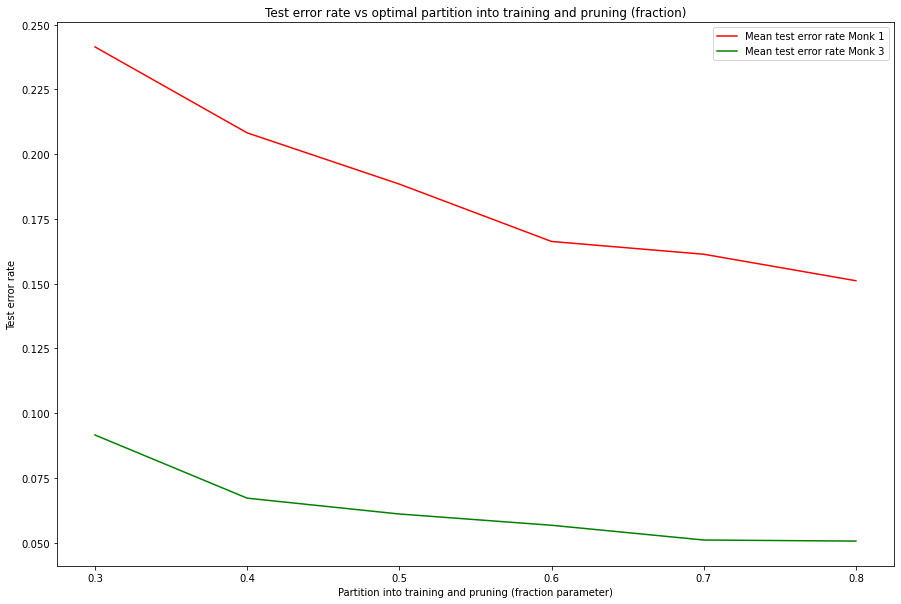

In [47]:
# Plotting Mean Error vs Optimal Partition
plt.figure(figsize = (15,10))
plt.title("Test error rate vs optimal partition into training and pruning (fraction)")
plt.xlabel("Partition into training and pruning (fraction parameter)")
plt.ylabel("Test error rate")
sns.lineplot(x = fractions, y = mean_list_monk1, label = "Mean test error rate Monk 1", color = 'r');
sns.lineplot(x = fractions, y = mean_list_monk3, label = "Mean test error rate Monk 3", color = 'g');
plt.legend();

**The bigger the training set in comparison to the validation set, the smaller the error rate.**

No handles with labels found to put in legend.


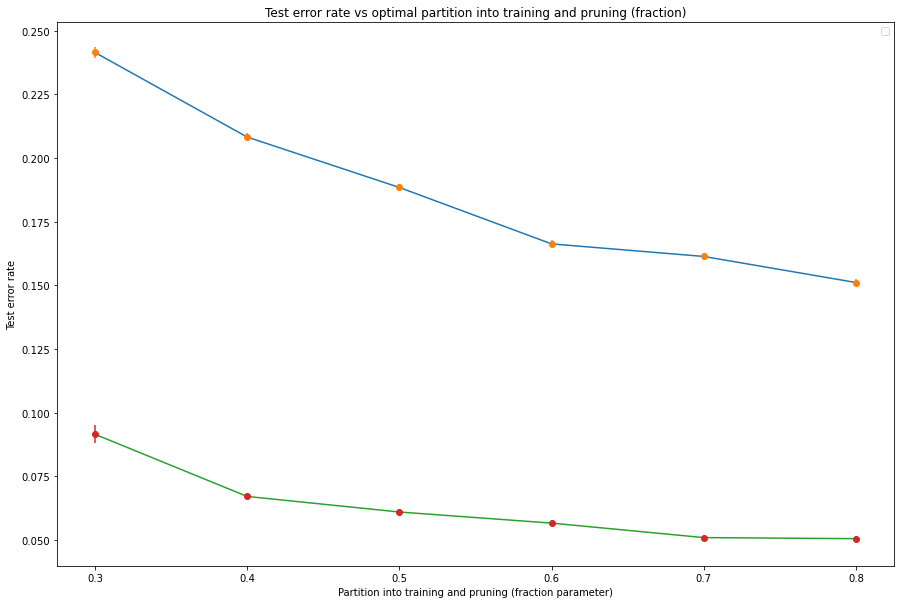

In [69]:
# Plotting Mean Error vs Optimal Partition
plt.figure(figsize = (15,10))
plt.title("Test error rate vs optimal partition into training and pruning (fraction)")
plt.xlabel("Partition into training and pruning (fraction parameter)")
plt.ylabel("Test error rate")
plt.plot(fractions, mean_list_monk1)
plt.errorbar(fractions, mean_list_monk1, yerr=variance_list_monk1, fmt="o")
plt.plot(fractions, mean_list_monk3)
plt.errorbar(fractions, mean_list_monk3, yerr=variance_list_monk3, fmt="o")
plt.legend();